# Lung cancer Analysis


In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Loading of the Dataset

In [3]:
# Loading the dataset
url='https://drive.google.com/file/d/1hIjlEeOgcVUQQ36LcnyT1_xBNBuRE7NY/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url2)

In [5]:
# df_poland = pd.read_csv("covid_caner_poland.csv")

In [6]:
# Craeting a copy of the same set
df_poland =  df.copy()

In [7]:
# Checking the head of the dataset
df_poland.head()

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
0,NIE,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,8.0,7.0,Alive
1,NIE,2019,VATS,Lobectomy,NO,Squamous cell carcinoma,IV,Advanced,6.0,3.0,Alive
2,NIE,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,8.0,5.0,Alive
3,NIE,2019,Open,Lobectomy,NO,Squamous cell carcinoma,I,Early,6.0,4.0,Alive
4,TAK,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,5.0,4.0,Alive


In [6]:
# Creating usique identifiers of my dataset.
df_poland['unique_ID'] = [i for i in range(df_poland.shape[0])]
# Confirming the operation
df_poland.set_index('unique_ID').head()

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
unique_ID,,,,,,,,,,,
0,NIE,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,8.0,7.0,Alive
1,NIE,2019,VATS,Lobectomy,NO,Squamous cell carcinoma,IV,Advanced,6.0,3.0,Alive
2,NIE,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,8.0,5.0,Alive
3,NIE,2019,Open,Lobectomy,NO,Squamous cell carcinoma,I,Early,6.0,4.0,Alive
4,TAK,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,5.0,4.0,Alive


# Data Cleaning 

In [7]:
#df_poland.to_csv('new_poland_covid_cancer.csv')

## Duplicated Values

In [8]:
# Checking for duplicated values
df_poland.duplicated().sum()


0

#### There are no duplicated values in the dataset

## Checking for missing values in the dataset

In [9]:
# Creating a function to check for percentage of missing values and put it in a dataframe
def missing_percentage(data):
  df=(data.isnull().sum()/len(data)*100)
  missing_frame=pd.DataFrame({"Column_names":df.index,"%_missing":df.values})
  return missing_frame


In [10]:
# Executing the function
missing_percentage(df_poland)

,Column_names,%_missing
0,Invasive mediastinal staging,0.000000
1,Date of surgery,0.000000
2,Approach,0.109559
3,Type of surgery,0.000000
4,Sleeve - bronchial,0.000000
5,Histology,1.054506
6,Stage,1.314708
7,Stage.1,1.314708
8,Total hospital stay,1.698165
9,Postoperative hospital stay,2.643111


#### Dealing with missing values

In [11]:
# Checking datatypes
df_poland[['Histology','Stage','Stage.1','Total hospital stay','Postoperative hospital stay']].dtypes

Histology                       object
Stage                           object
Stage.1                         object
Total hospital stay            float64
Postoperative hospital stay    float64
dtype: object

In [12]:
# A function to deal with missing values in the continous variables
def fill_miss(data,col1,col2):
  df1=data[col1].groupby(data[col2]).mean()
  if data[col2].any =='Alive':
    data[col1]=data[col1].fillna(df1[0])
  else:
    data[col1]=data[col1].fillna(df1[1])
  return data.isnull().sum()


In [13]:
# Executong the function on the total hospital stay column
fill_miss(df_poland,'Total hospital stay','Outcome at discharge')

Invasive mediastinal staging      0
Date of surgery                   0
Approach                          8
Type of surgery                   0
Sleeve - bronchial                0
Histology                        77
Stage                            96
Stage.1                          96
Total hospital stay               0
Postoperative hospital stay     193
Outcome at discharge              0
unique_ID                         0
dtype: int64

In [14]:
# Executing the function on the post operative hospital stay column
fill_miss(df_poland,'Postoperative hospital stay','Outcome at discharge')

Invasive mediastinal staging     0
Date of surgery                  0
Approach                         8
Type of surgery                  0
Sleeve - bronchial               0
Histology                       77
Stage                           96
Stage.1                         96
Total hospital stay              0
Postoperative hospital stay      0
Outcome at discharge             0
unique_ID                        0
dtype: int64

#### Dealing with missing value in the other columns

In [15]:
# Categorical column which had a missing percentage of about 1.3%
df_poland[['Histology','Stage','Stage.1']].isnull().sum()

Histology    77
Stage        96
Stage.1      96
dtype: int64

#### Dropping the missing values in the categorical columns

In [16]:
# Dropping the missing values in the  categorical columns
df_poland.dropna(axis=0,inplace=True)

In [17]:
# Calling the function to check for missing values
missing_percentage(df_poland)

,Column_names,%_missing
0,Invasive mediastinal staging,0.0
1,Date of surgery,0.0
2,Approach,0.0
3,Type of surgery,0.0
4,Sleeve - bronchial,0.0
5,Histology,0.0
6,Stage,0.0
7,Stage.1,0.0
8,Total hospital stay,0.0
9,Postoperative hospital stay,0.0


#### There are no more missing values in the dataset.

In [18]:
# Setting unique_ID as the index
df_poland = df_poland.set_index('unique_ID')

In [19]:
# Confirming the operation
df_poland.head()

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
unique_ID,,,,,,,,,,,
0,NIE,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,8.0,7.0,Alive
1,NIE,2019,VATS,Lobectomy,NO,Squamous cell carcinoma,IV,Advanced,6.0,3.0,Alive
2,NIE,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,8.0,5.0,Alive
3,NIE,2019,Open,Lobectomy,NO,Squamous cell carcinoma,I,Early,6.0,4.0,Alive
4,TAK,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,5.0,4.0,Alive


## Checking for outliers and anomalies

In [20]:
# Checking for anomalies in the Invasive mediastinal staging column
df_poland['Invasive mediastinal staging'].unique()
# The half of the dataset is in Polish

array(['NIE', 'TAK', 'NO', 'YES'], dtype=object)

In [21]:
# Function to replace the polish words
def replacing(data,col,old,new):
  data[col]=data[col].str.replace(old,new)
  return data[col].unique()


In [22]:
# Executing the function on the first column.
replacing(df_poland,'Invasive mediastinal staging','NIE','NO')
replacing(df_poland,'Invasive mediastinal staging','TAK','YES')

array(['NO', 'YES'], dtype=object)

In [23]:
df_poland.head()

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
unique_ID,,,,,,,,,,,
0,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,8.0,7.0,Alive
1,NO,2019,VATS,Lobectomy,NO,Squamous cell carcinoma,IV,Advanced,6.0,3.0,Alive
2,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,8.0,5.0,Alive
3,NO,2019,Open,Lobectomy,NO,Squamous cell carcinoma,I,Early,6.0,4.0,Alive
4,YES,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,5.0,4.0,Alive


In [24]:
# Checking the unique values in the stage column
df_poland['Stage'].unique()


array(['I', 'IV', 'II', 'III'], dtype=object)

In [25]:
# Replacing the roman numbers with numerical values
vals_to_replace = {'I':1, 'IV':4, 'II':2, 'III':3}
df_poland['Stage'] = df_poland['Stage'].map(vals_to_replace)

# Confirming the operation
df_poland['Stage'].unique()

array([1, 4, 2, 3])

### Anomalies and Outliers in the continous variables.

In [26]:
# Checking the datatypes
df_poland.dtypes

Invasive mediastinal staging     object
Date of surgery                   int64
Approach                         object
Type of surgery                  object
Sleeve - bronchial               object
Histology                        object
Stage                             int64
Stage.1                          object
Total hospital stay             float64
Postoperative hospital stay     float64
Outcome at discharge             object
dtype: object

#### Anomalies in the numerical values

In [27]:
# Checking for anomalies in the Postoperative hospital stay 
df_poland['Postoperative hospital stay'].unique()

array([  7.        ,   3.        ,   5.        ,   4.        ,
        12.        , 146.        ,  14.        ,  11.        ,
         6.        ,  15.        ,   8.        ,  22.76315789,
        18.        ,  43.        ,  13.        ,  30.        ,
        19.        ,  25.        ,  10.        ,  32.        ,
         2.        ,  16.        ,   9.        ,  22.        ,
        28.        ,  54.        ,  23.        ,  41.        ,
        20.        ,  29.        ,  21.        ,  76.        ,
        27.        ,  17.        ,  36.        ,  47.        ,
        70.        ,   1.        ,  85.        ,  34.        ,
        62.        ,  33.        ,  42.        ,  24.        ,
        44.        ,  48.        ,  40.        ,  35.        ,
        31.        ,  26.        ,  50.        ,  46.        ,
        37.        ,  53.        ,  45.        , 190.        ,
        96.        ,  52.        ,  68.        ,  78.        ,
        49.        ,  67.        ,  39.        ,  64.  

In [28]:
# Checking for anomalies in the Total hospital stay set
df_poland['Total hospital stay'].unique()

array([  8.        ,   6.        ,   5.        ,  31.        ,
       160.        ,  17.        ,  10.        ,  26.        ,
         4.        ,   7.        ,  11.        ,  26.01298701,
        21.        ,  22.        ,  12.        ,  14.        ,
        13.        ,  18.        ,  76.        ,  20.        ,
         9.        ,  48.        ,  35.        ,  29.        ,
        42.        ,   3.        ,  19.        ,  27.        ,
        15.        ,  23.        ,  32.        ,  40.        ,
        64.        ,  43.        , 103.        ,  28.        ,
        30.        ,  16.        ,  88.        ,  37.        ,
        77.        ,  25.        ,  24.        ,  34.        ,
        57.        ,  50.        ,  67.        ,  91.        ,
       102.        ,  49.        ,  63.        ,  39.        ,
        46.        ,  36.        ,  75.        ,  51.        ,
        33.        , 116.        ,  56.        ,  47.        ,
        61.        ,  38.        ,  54.        ,  93.  

#### There were anomalies in both columns in that the days were expressed in decimal form which is an anomally.

In [29]:
# A function to round off values in both columns to remove the decimals
def rounding(data,col):
  data[col]=data[col].apply(np.ceil)
  return data[col].unique()

In [30]:
# Rounding the values
rounding(df_poland,'Total hospital stay')

array([  8.,   6.,   5.,  31., 160.,  17.,  10.,  26.,   4.,   7.,  11.,
        27.,  21.,  22.,  12.,  14.,  13.,  18.,  76.,  20.,   9.,  48.,
        35.,  29.,  42.,   3.,  19.,  15.,  23.,  32.,  40.,  64.,  43.,
       103.,  28.,  30.,  16.,  88.,  37.,  77.,  25.,  24.,  34.,  57.,
        50.,  67.,  91., 102.,  49.,  63.,  39.,  46.,  36.,  75.,  51.,
        33., 116.,  56.,  47.,  61.,  38.,  54.,  93., 190.,  97.,  44.,
        45.,  58.,   2., 177.,  41.,  78., 195.,  68.,  53.,  62.,  79.,
        74.,  52.,  59., 162.,  89., 181., 175.,  81.,  82.,  98., 150.,
        71.,  94., 128.])

In [31]:
# Rounding the values in the post operative hospital stay columns
rounding(df_poland,'Postoperative hospital stay')

array([  7.,   3.,   5.,   4.,  12., 146.,  14.,  11.,   6.,  15.,   8.,
        23.,  18.,  43.,  13.,  30.,  19.,  25.,  10.,  32.,   2.,  16.,
         9.,  22.,  28.,  54.,  41.,  20.,  29.,  21.,  76.,  27.,  17.,
        36.,  47.,  70.,   1.,  85.,  34.,  62.,  33.,  42.,  24.,  44.,
        48.,  40.,  35.,  31.,  26.,  50.,  46.,  37.,  53.,  45., 190.,
        96.,  52.,  68.,  78.,  49.,  67.,  39.,  64.,  91.,  86.,  97.,
       126.,  51.])

In [32]:
# Checking for numerical values in the dataset
numerical_cols = [col for col in df_poland if df_poland[col].dtypes !='O']
numerical_cols

['Date of surgery',
 'Stage',
 'Total hospital stay',
 'Postoperative hospital stay']

### Outliers in numerical variables

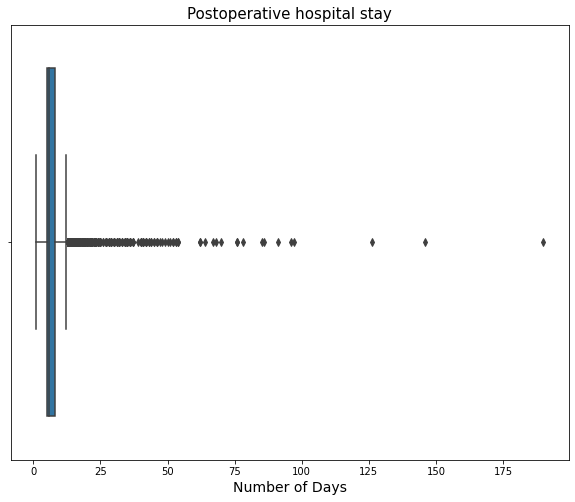

In [33]:
# Boxplot of the Postoperative Hospital 
plt.figure(figsize=(10,8))
plt.title('Postoperative hospital stay',fontsize=15)
sns.boxplot(x=df_poland['Postoperative hospital stay'])
plt.xlabel('Number of Days',fontsize=14)
plt.show()

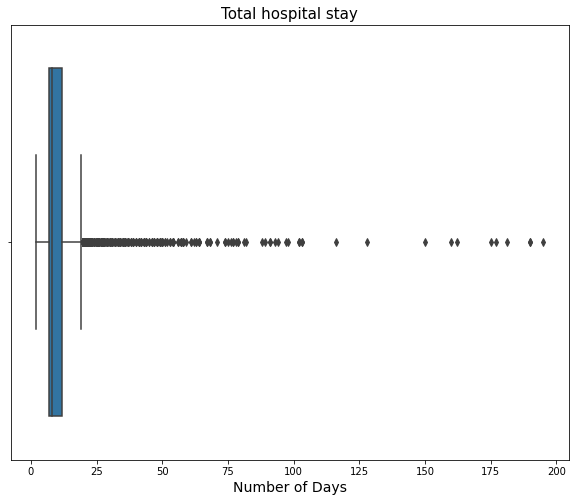

In [34]:
# Boxplot of the Total hospital stay 
plt.figure(figsize=(10,8))
plt.title('Total hospital stay',fontsize=15)
sns.boxplot(x=df_poland['Total hospital stay'])
plt.xlabel("Number of Days",fontsize=14)
plt.show()

In [35]:
df_poland['Type of surgery'].unique()

array(['Lobectomy', 'Pneumonectomy', 'Bilobectomy', 'Wedge resection',
       'Segmentectomy', 'Wyci?cie mankietu oskrzela'], dtype=object)

In [36]:
df_poland['Type of surgery'].value_counts()

Lobectomy                     5455
Segmentectomy                  590
Pneumonectomy                  451
Bilobectomy                    348
Wedge resection                340
Wyci?cie mankietu oskrzela      15
Name: Type of surgery, dtype: int64

In [37]:
replacing(df_poland,'Type of surgery','Wyci?cie mankietu oskrzela','Broncial cuff excision')# Remember to replace

array(['Lobectomy', 'Pneumonectomy', 'Bilobectomy', 'Wedge resection',
       'Segmentectomy', 'Wyci?cie mankietu oskrzela'], dtype=object)

In [38]:
# Exporting to CSV
df_poland.to_csv("Clean dataset.csv",index=False)

## Dealing with Outliers
* Patients who spent more than 150 days at the hospital.

In [39]:
df_poland.head()

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
unique_ID,,,,,,,,,,,
0,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,8.0,7.0,Alive
1,NO,2019,VATS,Lobectomy,NO,Squamous cell carcinoma,4,Advanced,6.0,3.0,Alive
2,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,8.0,5.0,Alive
3,NO,2019,Open,Lobectomy,NO,Squamous cell carcinoma,1,Early,6.0,4.0,Alive
4,YES,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,5.0,4.0,Alive


In [40]:
# Extracting outliers from the dataset
outliers=df_poland.loc[df_poland['Total hospital stay']>=150]
outliers.index

Int64Index([6, 2709, 3628, 3703, 4389, 5187, 5632, 5685, 6312], dtype='int64', name='unique_ID')

In [41]:
# Dropping entries with outliers.
dropped_df_poland=df_poland.drop(outliers.index,axis=0)
dropped_df_poland

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
unique_ID,,,,,,,,,,,
0,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,8.0,7.0,Alive
1,NO,2019,VATS,Lobectomy,NO,Squamous cell carcinoma,4,Advanced,6.0,3.0,Alive
2,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,8.0,5.0,Alive
3,NO,2019,Open,Lobectomy,NO,Squamous cell carcinoma,1,Early,6.0,4.0,Alive
4,YES,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,5.0,4.0,Alive
...,...,...,...,...,...,...,...,...,...,...,...
7297,NO,2020,VATS,Lobectomy,NO,Adenocarcinoma,1,Early,7.0,6.0,Alive
7298,NO,2020,VATS,Lobectomy,NO,Adenocarcinoma,1,Early,6.0,5.0,Alive
7299,NO,2020,Open,Lobectomy,NO,Squamous cell carcinoma,2,Early,7.0,6.0,Alive


In [42]:
dropped_df_poland.loc[dropped_df_poland['Total hospital stay']>=150]

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
unique_ID,,,,,,,,,,,


## Exploratory Data Analysis

1. Univariate Analysis

In [43]:
df_poland.head()

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
unique_ID,,,,,,,,,,,
0,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,8.0,7.0,Alive
1,NO,2019,VATS,Lobectomy,NO,Squamous cell carcinoma,4,Advanced,6.0,3.0,Alive
2,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,8.0,5.0,Alive
3,NO,2019,Open,Lobectomy,NO,Squamous cell carcinoma,1,Early,6.0,4.0,Alive
4,YES,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,5.0,4.0,Alive


In [44]:
objects= [cols for cols in df_poland if df_poland[cols].dtypes=='O']
objects

['Invasive mediastinal staging',
 'Approach',
 'Type of surgery',
 'Sleeve - bronchial',
 'Histology',
 'Stage.1',
 'Outcome at discharge']

#### The number of patients that underwent invasive medistinal staging were more than those that didnt.

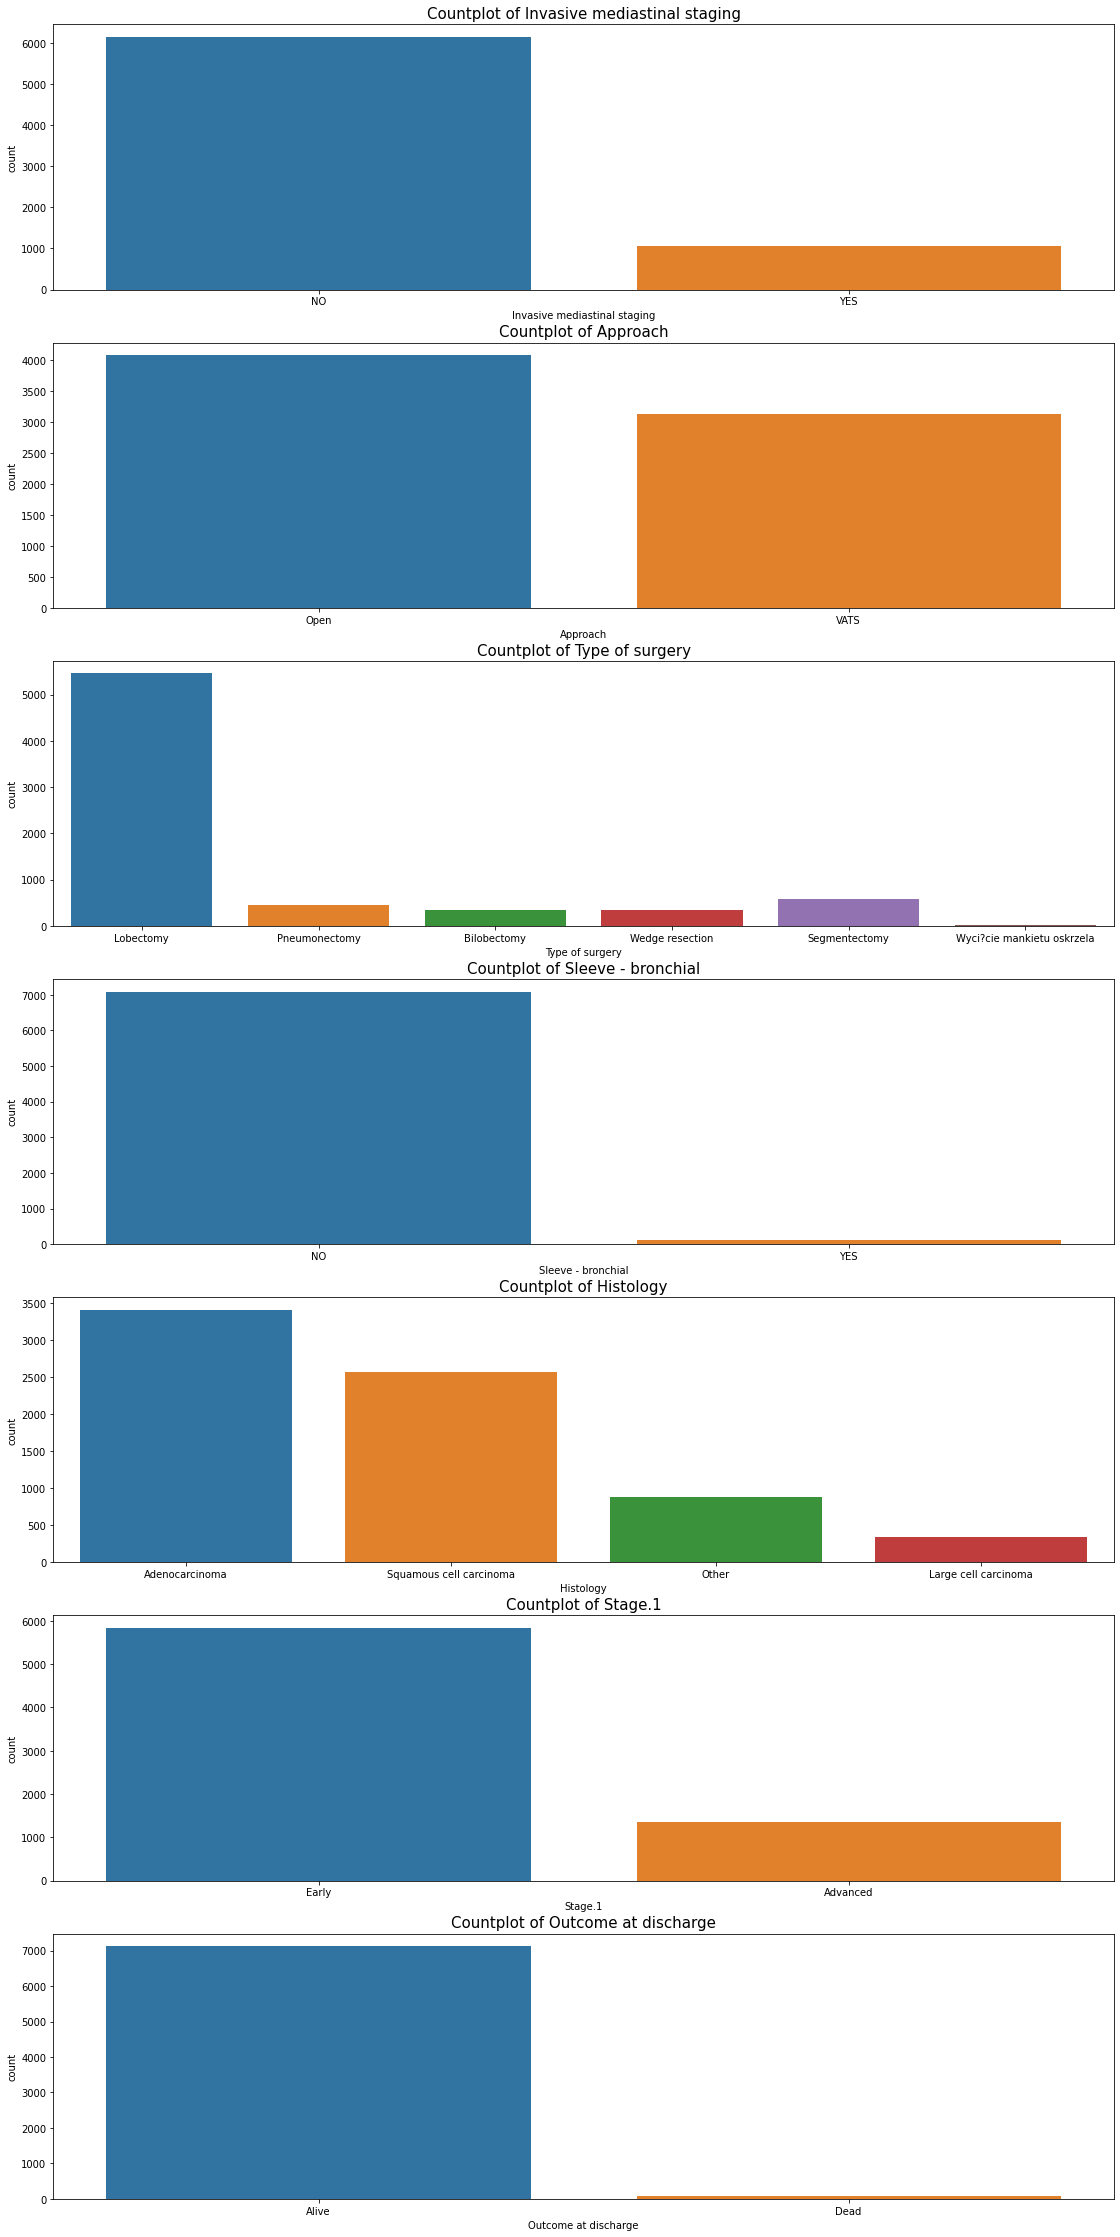

In [45]:
fig,ax=plt.subplots(len(objects),figsize=(19,40))
for i, col_vals in enumerate(objects):
  sns.countplot(x=df_poland[col_vals],ax=ax[i])
  ax[i].set_title("Countplot of "+format(col_vals),fontsize=15)
plt.show()

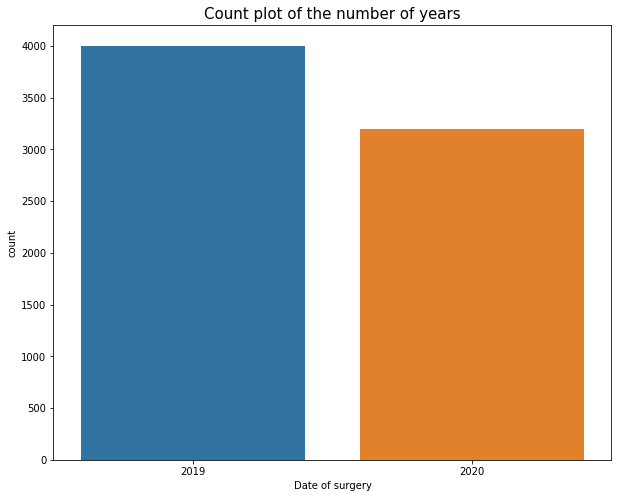

In [46]:
plt.figure(figsize=(10,8))
sns.countplot(x=df_poland['Date of surgery'])
plt.title("Count plot of the number of years",fontsize=15)
plt.show()

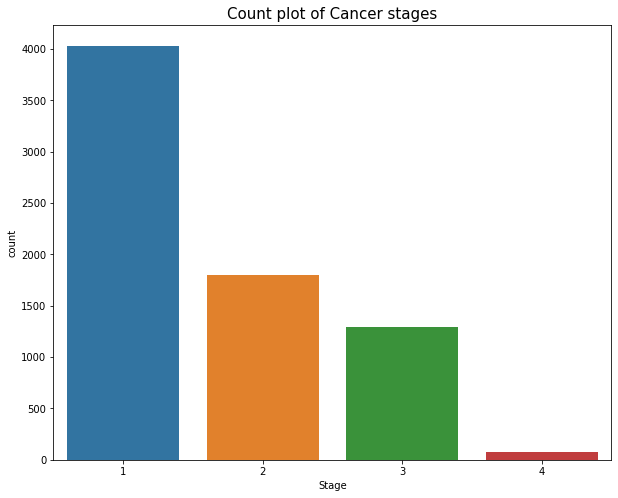

In [47]:
plt.figure(figsize=(10,8))
sns.countplot(x=df_poland['Stage'])
plt.title("Count plot of Cancer stages",fontsize=15)
plt.show()

*  Fewer patients underwent invasive medialstinal staging as compared to those that underwent.
*  Open surgery was done frequently as compared to the Video-assisted thoracoscopic surgery
* The leading count of surgery types was lobectomy followed closely by segmentectomy. This could be attributed to the simplicity in the  prpceedures.
* A lot of patients presented with Adenocarcinoma as compared to other types of cancers.
* Patients at early stages were found in the observations as compared to those at advanced stages.
* Alive patients were more than dead patients.

### Continous Variables

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


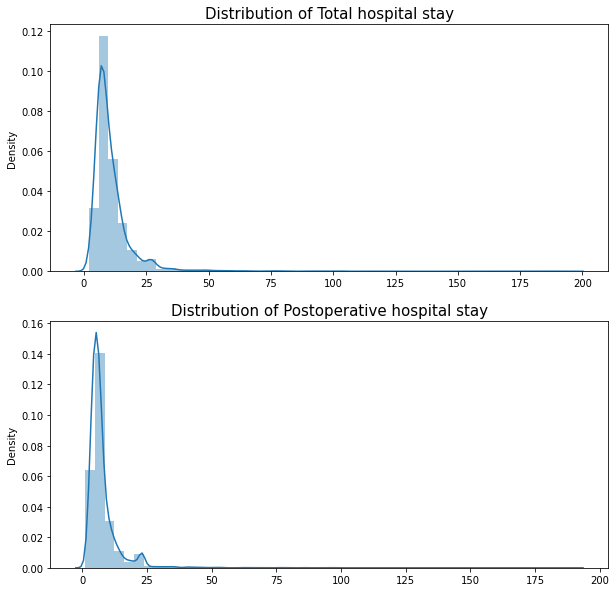

In [48]:
num_cols=['Total hospital stay','Postoperative hospital stay']
fig,ax=plt.subplots(len(num_cols),figsize=(10,10))
for i, col_vals in enumerate(num_cols):
  sns.distplot(x=df_poland[col_vals],ax=ax[i],kde=True)
  ax[i].set_title("Distribution of "+format(col_vals),fontsize=15)
plt.show()

From the distribution plot we get to see that most people did not spend time in the hospital as our distribution is skewed positively . However , some outliers are seen to be at the 3rd quantile where some patients spent more than 200 days in the hospital.

## Bivariate Analysis.

### This is meant to help us understand the relationships within our dataset.

In [49]:
df_poland.head()

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
unique_ID,,,,,,,,,,,
0,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,8.0,7.0,Alive
1,NO,2019,VATS,Lobectomy,NO,Squamous cell carcinoma,4,Advanced,6.0,3.0,Alive
2,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,8.0,5.0,Alive
3,NO,2019,Open,Lobectomy,NO,Squamous cell carcinoma,1,Early,6.0,4.0,Alive
4,YES,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,5.0,4.0,Alive


# Research Questions
####  * What was the reliability of open surgery as compare to Video assisted surgery considering the post discharge Outcome?


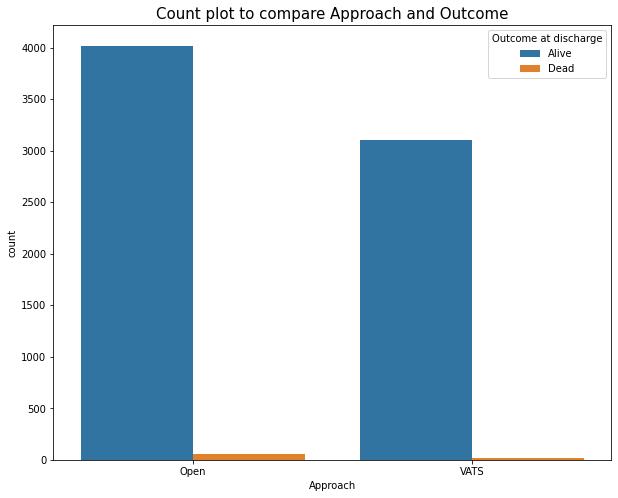

In [50]:
# Assesing the relationship between The suregery approach to the discharge outcome
plt.figure(figsize=(10,8))
sns.countplot(x='Approach',hue='Outcome at discharge',data=df_poland)
plt.title("Count plot to compare Approach and Outcome",fontsize=15)
plt.show()

#### * Patients who underwent open surgeries had a higher death count as compared to patients that underwent Video assisted thoracoscopic surgery.

## What is the effectiveness of invasive mediastinal staging considering the patient's outcome after discharge?

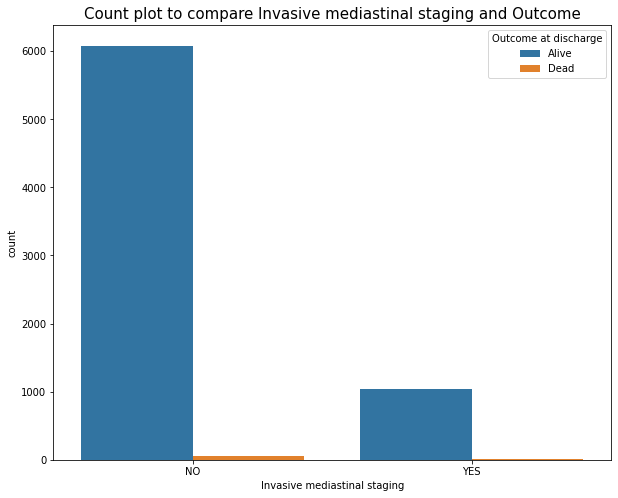

In [51]:
# Asessing the relationship between patients that underwent invasive mediastinal staging and its outcome
plt.figure(figsize=(10,8))
sns.countplot(x='Invasive mediastinal staging',hue='Outcome at discharge',data=df_poland)
plt.title("Count plot to compare Invasive mediastinal staging and Outcome",fontsize=15)
plt.show() 

* As much as there are a greater number of people who were alive after discharge,the people who didnt undergo the Invasive mediastinal staging had a higher death count as compared to those who underwent. 

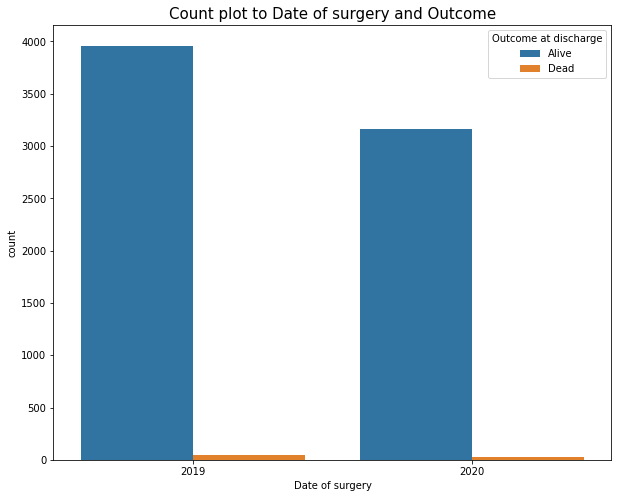

In [52]:
# A plot of the relationship between Date of surgery and Outcome
plt.figure(figsize=(10,8))
sns.countplot(x='Date of surgery',hue='Outcome at discharge',data=df_poland)
plt.title("Count plot to Date of surgery and Outcome",fontsize=15)
plt.show()

* More counts of patients were seen in 2019 than in 2020. The death margin is however infintisimally small.

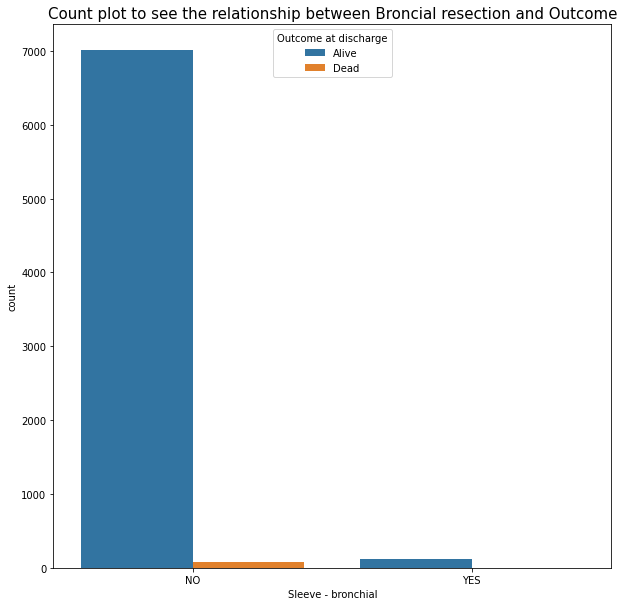

In [53]:
# A plot to assess the relationship between Broncial resection and Outcome
plt.figure(figsize=(10,10))
sns.countplot(x='Sleeve - bronchial',hue='Outcome at discharge',data=df_poland)
plt.title("Count plot to see the relationship between Broncial resection and Outcome",fontsize=15)
plt.show()

* We dont have a single patient who underwent bronchial resection that died. We can see however that very few who didnt undergo the bronchial resection died.

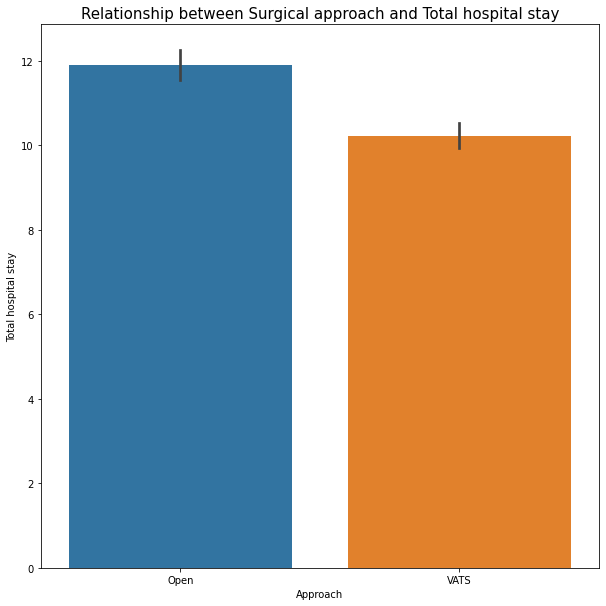

In [54]:
# Understanding the relationship between Surgical approach and Total hospital stay
plt.figure(figsize=(10,10))
sns.barplot(x='Approach',y='Total hospital stay',data=df_poland)
plt.title("Relationship between Surgical approach and Total hospital stay",fontsize=15)
plt.show()

* Most patients who underwent open surgery spent more days in the hospitals as comapred to those who underwent video assisted thorascopic Surgery.

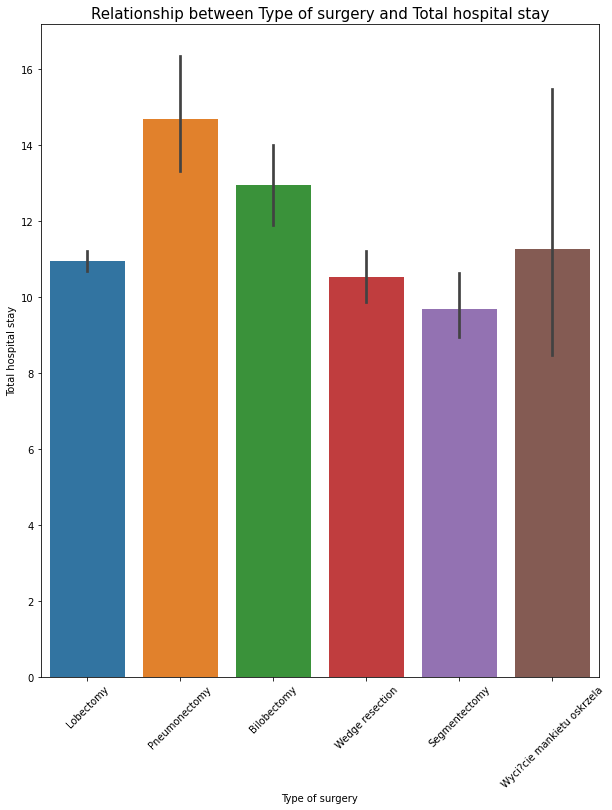

In [55]:
# Plotting the relationship between Type of surgery and Total hospital stay
plt.figure(figsize=(10,12))
sns.barplot(x='Type of surgery',y='Total hospital stay',data=df_poland)
plt.title("Relationship between Type of surgery and Total hospital stay",fontsize=15)
plt.xticks (rotation=45)
plt.show()

* Ptients who underwent Pneumonectomy proceedure spent most days in the hospital followed closely by bilobectomy. 

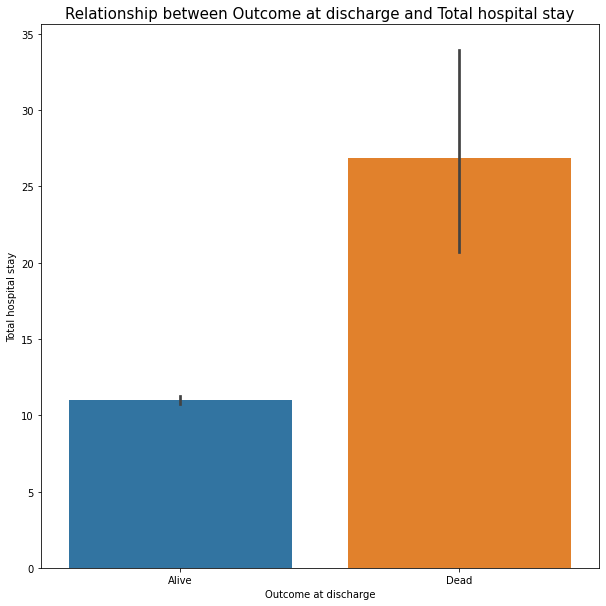

In [56]:
# Plotting the relationship between Outcome at discharge and Total hospital stay
plt.figure(figsize=(10,10))
sns.barplot(x='Outcome at discharge',y='Total hospital stay',data=df_poland)
plt.title("Relationship between Outcome at discharge and Total hospital stay",fontsize=15)
plt.show()

* Patients who spent more days in the hospital had a higher death count. This though subject to investigation in the multivariate analysis could be attributed to the stage of the cancer and the proceedures that the patients underwent.

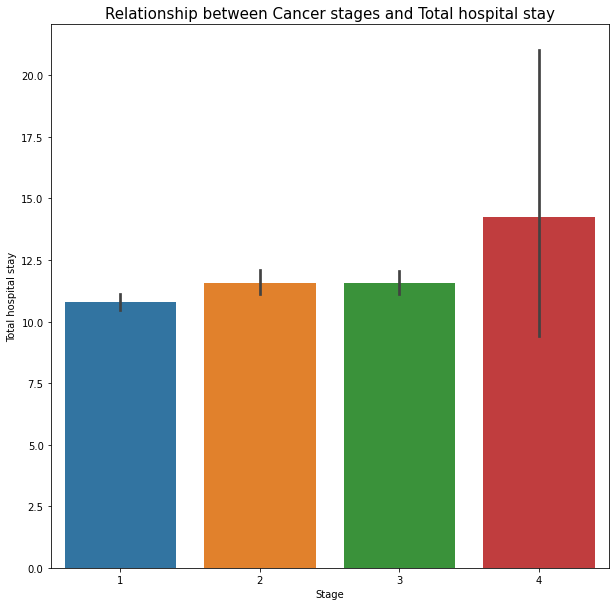

In [57]:
# Relationship between Cancer stages and Total hospital stay 
plt.figure(figsize=(10,10))
sns.barplot(x='Stage',y='Total hospital stay',data=df_poland)
plt.title("Relationship between Cancer stages and Total hospital stay",fontsize=15)
plt.show()

* The patients at stage 4 spent more days in the hospital as compared to the first,second and third consecutively.

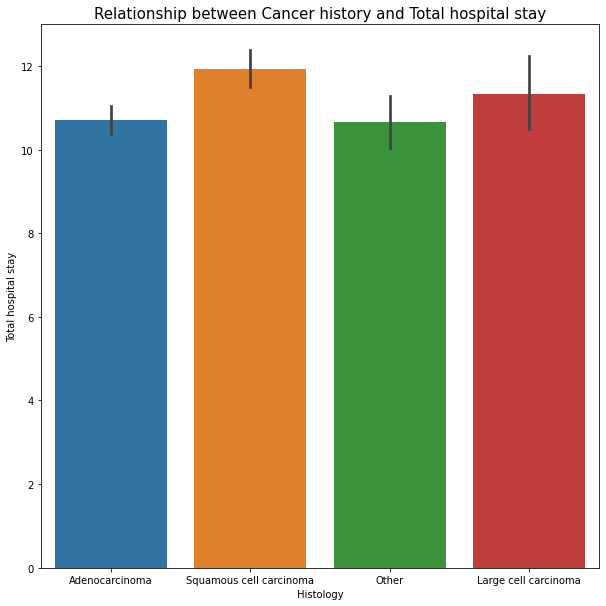

In [58]:
# Relationship between Cancer history and Total hospital stay
plt.figure(figsize=(10,10))
sns.barplot(x='Histology',y='Total hospital stay',data=df_poland)
plt.title("Relationship between Cancer history and Total hospital stay",fontsize=15)
plt.show()

* Patients with squamous cell carcinoma spent more days in the hospital followed closely by the patients with Large cell carcinoma. 

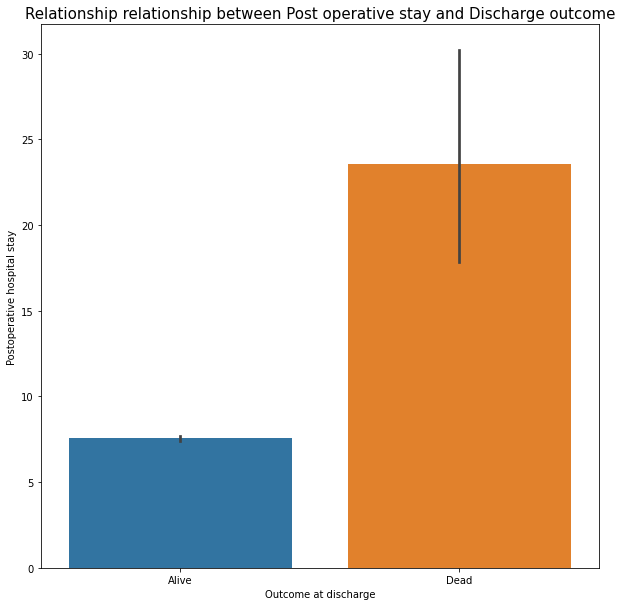

In [59]:
# Plotting the relationship between Post operative stay and Discharge outcom
plt.figure(figsize=(10,10))
sns.barplot(x='Outcome at discharge',y='Postoperative hospital stay',data=df_poland)
plt.title("Relationship relationship between Post operative stay and Discharge outcome",fontsize=15)
plt.show()

* The patients who had a higher duration of post operative stay had a higher death count as compared to those who spent less days. 

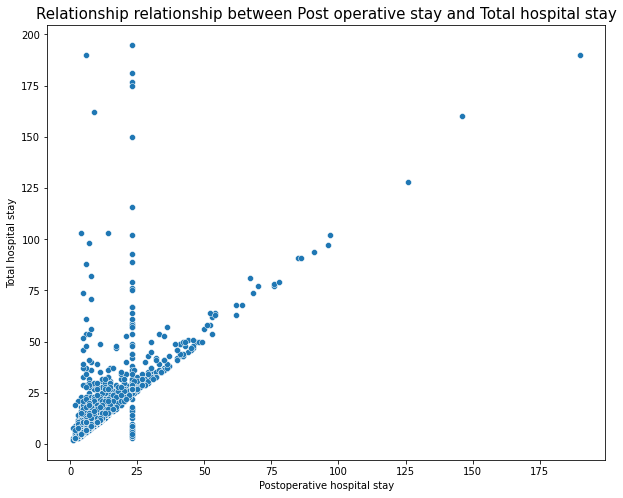

In [60]:
# Assessing the linear relationship between the Hospital stay and total hospital stay
plt.figure(figsize=(10,8))
sns.scatterplot(x='Postoperative hospital stay',y='Total hospital stay',data=df_poland)
plt.title("Relationship relationship between Post operative stay and Total hospital stay",fontsize=15)
plt.show()

In [61]:
# Statistical analysis of the relationship
import scipy.stats
x=df_poland['Total hospital stay'].values
y=df_poland['Postoperative hospital stay'].values
cor,pval=scipy.stats.pearsonr(x, y)
print(cor)
print(pval)
# There is a significant positive corelation between post operative hopital stay and total hospital stay.

0.7449946109227004
0.0


# Multivariate Analysis

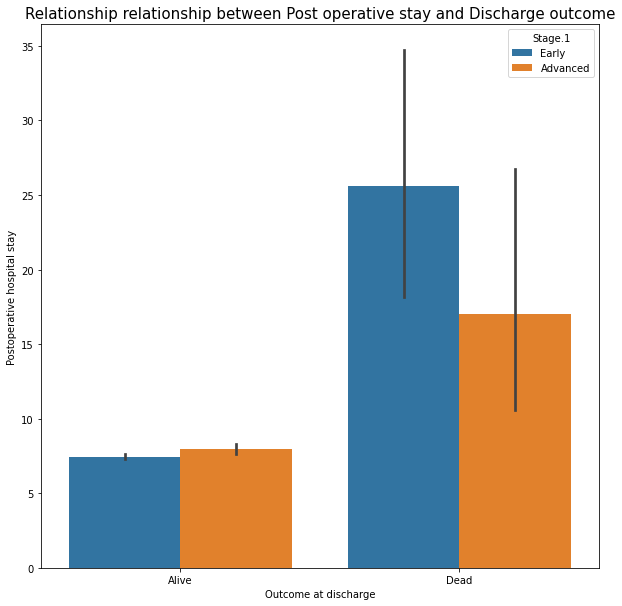

In [62]:
# Relationship between post operative stay and discharge outcome considering the cancer stage
plt.figure(figsize=(10,10))
sns.barplot(x='Outcome at discharge',y='Postoperative hospital stay',hue='Stage.1',data=df_poland)
plt.title("Relationship relationship between Post operative stay and Discharge outcome",fontsize=15)
plt.show()

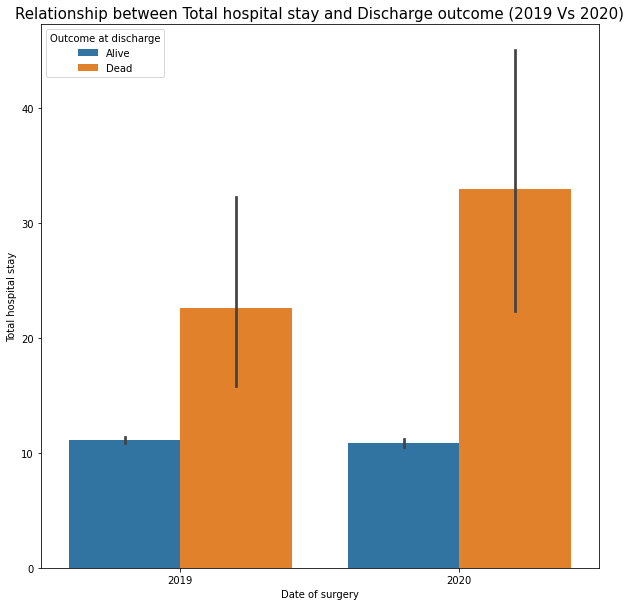

In [63]:
# Relationship between Total hospital stay and Discharge outcome (2019 Vs 2020)
plt.figure(figsize=(10,10))
sns.barplot(x='Date of surgery',y='Total hospital stay',hue='Outcome at discharge',data=df_poland)
plt.title("Relationship between Total hospital stay and Discharge outcome (2019 Vs 2020)",fontsize=15)
plt.show()

# Implementing the solution.


## Feature Engineering.

In [64]:
# viewing the clean dataset without outliers
#
dropped_df_poland.head()

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
unique_ID,,,,,,,,,,,
0,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,8.0,7.0,Alive
1,NO,2019,VATS,Lobectomy,NO,Squamous cell carcinoma,4,Advanced,6.0,3.0,Alive
2,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,8.0,5.0,Alive
3,NO,2019,Open,Lobectomy,NO,Squamous cell carcinoma,1,Early,6.0,4.0,Alive
4,YES,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,5.0,4.0,Alive


In [65]:
# getting the variables to encode 
#
objects

['Invasive mediastinal staging',
 'Approach',
 'Type of surgery',
 'Sleeve - bronchial',
 'Histology',
 'Stage.1',
 'Outcome at discharge']

In [66]:
# Label Encoding the datasets with two categories
#
from sklearn.preprocessing import LabelEncoder
cols = ['Invasive mediastinal staging','Sleeve - bronchial','Stage.1','Outcome at discharge','Approach']

le = LabelEncoder()
for col in cols: 
  le.fit(dropped_df_poland[col])
  dropped_df_poland[col] = le.transform(dropped_df_poland[col])
dropped_df_poland


,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
unique_ID,,,,,,,,,,,
0,0,2019,0,Lobectomy,0,Adenocarcinoma,1,1,8.0,7.0,0
1,0,2019,1,Lobectomy,0,Squamous cell carcinoma,4,0,6.0,3.0,0
2,0,2019,0,Lobectomy,0,Adenocarcinoma,1,1,8.0,5.0,0
3,0,2019,0,Lobectomy,0,Squamous cell carcinoma,1,1,6.0,4.0,0
4,1,2019,0,Lobectomy,0,Adenocarcinoma,1,1,5.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...
7297,0,2020,1,Lobectomy,0,Adenocarcinoma,1,1,7.0,6.0,0
7298,0,2020,1,Lobectomy,0,Adenocarcinoma,1,1,6.0,5.0,0
7299,0,2020,0,Lobectomy,0,Squamous cell carcinoma,2,1,7.0,6.0,0


In [67]:
# Using get dummies to encode categories that had more than two categories in Histology
dummy = pd.get_dummies(dropped_df_poland['Histology'])


In [68]:
# Using get dummies to encode categories that had more than two categories in Type of surgery
dummy2 = pd.get_dummies(dropped_df_poland['Type of surgery'])

In [69]:
df_poland_new = pd.concat([dropped_df_poland, dummy,dummy2], axis = 1).drop(dropped_df_poland[["Type of surgery","Histology"]],axis = 1)
df_poland_new.head()

,Invasive mediastinal staging,Date of surgery,Approach,Sleeve - bronchial,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge,Adenocarcinoma,Large cell carcinoma,Other,Squamous cell carcinoma,Bilobectomy,Lobectomy,Pneumonectomy,Segmentectomy,Wedge resection,Wyci?cie mankietu oskrzela
unique_ID,,,,,,,,,,,,,,,,,,,
0,0,2019,0,0,1,1,8.0,7.0,0,1,0,0,0,0,1,0,0,0,0
1,0,2019,1,0,4,0,6.0,3.0,0,0,0,0,1,0,1,0,0,0,0
2,0,2019,0,0,1,1,8.0,5.0,0,1,0,0,0,0,1,0,0,0,0
3,0,2019,0,0,1,1,6.0,4.0,0,0,0,0,1,0,1,0,0,0,0
4,1,2019,0,0,1,1,5.0,4.0,0,1,0,0,0,0,1,0,0,0,0


In [70]:
# Replacing the spaces in the column titles with _ for usability in the application
df_poland_new.columns=df_poland_new.columns.str.replace(' ','_')
df_poland_new

,Invasive_mediastinal_staging,Date_of_surgery,Approach,Sleeve_-_bronchial,Stage,Stage.1,Total_hospital_stay,Postoperative_hospital_stay,Outcome_at_discharge,Adenocarcinoma,Large_cell_carcinoma,Other,Squamous_cell_carcinoma,Bilobectomy,Lobectomy,Pneumonectomy,Segmentectomy,Wedge_resection,Wyci?cie_mankietu_oskrzela
unique_ID,,,,,,,,,,,,,,,,,,,
0,0,2019,0,0,1,1,8.0,7.0,0,1,0,0,0,0,1,0,0,0,0
1,0,2019,1,0,4,0,6.0,3.0,0,0,0,0,1,0,1,0,0,0,0
2,0,2019,0,0,1,1,8.0,5.0,0,1,0,0,0,0,1,0,0,0,0
3,0,2019,0,0,1,1,6.0,4.0,0,0,0,0,1,0,1,0,0,0,0
4,1,2019,0,0,1,1,5.0,4.0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7297,0,2020,1,0,1,1,7.0,6.0,0,1,0,0,0,0,1,0,0,0,0
7298,0,2020,1,0,1,1,6.0,5.0,0,1,0,0,0,0,1,0,0,0,0
7299,0,2020,0,0,2,1,7.0,6.0,0,0,0,0,1,0,1,0,0,0,0


In [106]:
# Data Preparation (Predictors and Target values )
x = df_poland_new.drop("Total_hospital_stay", axis = 1)
Y = df_poland_new['Total_hospital_stay']

In [72]:
# Checking for multicollinearity
#
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Feat"] = x.columns
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Factor,Feat
0,1.025404,Invasive_mediastinal_staging
1,1.007184,Date_of_surgery
2,1.140550,Approach
3,1.023219,Sleeve_-_bronchial
4,3.746119,Stage
5,3.611813,Stage.1
6,1.088206,Postoperative_hospital_stay
7,1.051384,Outcome_at_discharge
8,inf,Adenocarcinoma
9,inf,Large_cell_carcinoma


In [73]:
# Dropping a the columns with high VIF
x2 = x.drop(columns = ["Date_of_surgery","Stage.1","Lobectomy","Postoperative_hospital_stay","Adenocarcinoma"], axis = 1)


In [74]:
# Plotting the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Factor"] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
vif["Feat"] = x2.columns
vif

,Factor,Feat
0,1.165734,Invasive_mediastinal_staging
1,1.483501,Approach
2,1.036556,Sleeve_-_bronchial
3,2.438748,Stage
4,1.014208,Outcome_at_discharge
5,1.095383,Large_cell_carcinoma
6,1.200230,Other
7,1.658570,Squamous_cell_carcinoma
8,1.106689,Bilobectomy
9,1.193232,Pneumonectomy


In [75]:
# A function to plot feature importance
def extra_tree_regressor(x,Y):
  
    from sklearn.ensemble import ExtraTreesRegressor

    model = ExtraTreesRegressor()

    model.fit(x,Y)

    model_import = model.feature_importances_
    print(model_import)
    feat_imp = pd.Series(model.feature_importances_, index=x.columns)

    feat_imp.nlargest(13).plot.barh(figsize = (10,8))

    plt.title("Feature Importance")
    
    plt.show()

[0.15609518 0.07881967 0.01680598 0.19775125 0.18752073 0.03542364
 0.06952489 0.08968094 0.03007575 0.07349029 0.03393704 0.02623511
 0.00463953]


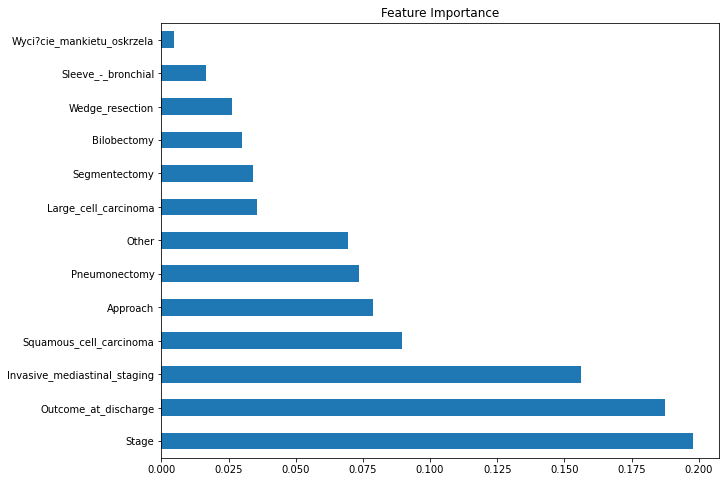

In [76]:
# Calling the function
extra_tree_regressor(x2,Y)

In [108]:
# dropping the least important features
#
x3 = x2.drop(columns = ["Wyci?cie_mankietu_oskrzela","Sleeve_-_bronchial","Wedge_resection","Outcome_at_discharge"], axis = 1).values
Y = df_poland_new['Total_hospital_stay'].values

### Baseline model

In [110]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

# splitting to test and train sets 
#
x_train, x_test, Y_train, Y_test = train_test_split(x3,Y,test_size=0.2,random_state = 0)

# Calling the regressor
#
regr = RandomForestRegressor(n_estimators = 500 , random_state = 0)

# Fitting the model
#
regr.fit(x_train,Y_train)

# Predicting the total number of days 
#
Y_pred = regr.predict(x_test)

from sklearn.metrics import mean_squared_error

# Calculating the RMSE
#
RMSE = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(RMSE)

9.306024699411


### Optimization of our baseline model

In [111]:
# Tuning of the hyperparameters
#
regr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [112]:
# Using the Random Forest Regressor
rf = RandomForestRegressor()

# obtaining the param grid
#
param_grid = {
     'max_depth': [3,5,10],
     'max_features': [2,3,5],
     'min_samples_leaf': [3,4,5],
     'min_samples_split': [4,6,8],
     'n_estimators': [200,300,500]
 }

 # performing grid search
 #
from sklearn.model_selection import GridSearchCV  
forest_search = GridSearchCV(estimator = rf , param_grid = param_grid, scoring = "neg_mean_squared_error", cv = 3, verbose = 1)
forest_search.fit(x_train, Y_train)


Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 10], 'max_features': [2, 3, 5],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [200, 300, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [113]:
my_params= forest_search.best_params_
my_params

{'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 200}

In [114]:
# Best Estimator
#
best_model = forest_search.best_estimator_
Y_pred_optimum = best_model.predict(x_test)
RMSE1 = np.sqrt(mean_squared_error(Y_test, Y_pred_optimum))
print(RMSE1)

9.134823599614805


In [129]:
# 
import pickle
file_name="best_model.pkl"
pickle.dump(best_model,open(file_name,'wb'))


### Optimizing using SVM

In [116]:
# Normalizing our features
#
x_train, x_test, Y_train, Y_test = train_test_split(x3,Y,test_size=0.2,random_state = 42)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [117]:
from sklearn.svm import SVR
# using svc regressor to tune hyperparameters
#
svm_reg = SVR()
# Obtaining the param grig
param_grid_svm = {'C': [0.1,1,10,100,1000],
                    'gamma': [1,0.1,0.01,0.001,0.0001],
                    'kernel': ['rbf']}

svm_search=GridSearchCV(estimator=svm_reg,
                           param_grid=param_grid_svm,
                           scoring="neg_mean_squared_error",
                           n_jobs=1,cv=5,verbose=1)
svm_search.fit(x_train, Y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='neg_mean_squared_error', verbose=1)

In [118]:
m_params = svm_search.best_estimator_
m_params

SVR(C=100, gamma=0.01)

In [119]:
# Best Estimator
#
best_model2 = svm_search.best_estimator_
Y_pred_optimum2 = best_model2.predict(x_test)
RMSE3 = np.sqrt(mean_squared_error(Y_test, Y_pred_optimum2))
print(RMSE3)

10.256283489297445


The Support Vector machine performed poorly with a poor RMSE.

In [120]:
df_poland.head(1)

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
unique_ID,,,,,,,,,,,
0,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,8.0,7.0,Alive


# Final Optimum Model

In [121]:
# Using Ensemble methods to tune the model
from sklearn.ensemble import GradientBoostingRegressor

gb=GradientBoostingRegressor()

# Hyperparameters to tune
gb.get_params()
param_grid={
    'alpha':[0.2,0.4,0.6],
    'learning_rate':[0.001,0.01,0.1],
    'max_depth':[2,6,8],
    'max_features': [2,3,5],
     'min_samples_leaf': [3,4,5],
     'n_estimators': [100,200,300]}
# Grid Search
gb_search = GridSearchCV(estimator = gb, param_grid = param_grid, scoring = "neg_mean_squared_error", cv = 3, verbose = 1)
gb_search.fit(x_train, Y_train)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [0.2, 0.4, 0.6],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [2, 6, 8], 'max_features': [2, 3, 5],
                         'min_samples_leaf': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [122]:
# Obtaining our best parameters
gb_params = gb_search.best_estimator_
gb_params

GradientBoostingRegressor(alpha=0.6, max_depth=2, max_features=2,
                          min_samples_leaf=5)

In [123]:
# Evaluating the model
best_model3 = gb_search.best_estimator_
Y_pred_optimum3 = best_model3.predict(x_test)
RMSE4 = np.sqrt(mean_squared_error(Y_test, Y_pred_optimum3))
print(RMSE4) 

9.893720706669622


In [124]:
# 
import pickle
file_name="gradient_boost.sav"
pickle.dump(best_model3,open(file_name,'wb'))

Our best model proved to be the Random Forest Tuned Model which had an RMSE of 9.13

# User Interface

In [156]:
# Testing the model on new data
def Lung_Cancer():
  cols=['Invasive_mediastinal_staging', 'Approach', 'Stage', 'Large_cell_carcinoma',
        'Other','Squamous_cell_carcinoma','Bilobectomy','Pneumonectomy','Segmentectomy']
    # The main DataFrame
  user_df=pd.DataFrame(columns=cols)
  user_df
    # Creating an empty break
  columns=[]
    # Iterating through evvery input to take in the value of the patients
  for i in cols:
    dp=str(input(i))
    columns.append(dp)
    print(dp)
    # User inputs
  my_df=pd.DataFrame(data=columns,index=cols)
  transposed=my_df.transpose()
  # Concating my inputs to the initial dataframe
  user_df=pd.concat([user_df,transposed],axis=0)
  user_df.dtypes
  user_df[['Invasive_mediastinal_staging',
          'Large_cell_carcinoma', 
            'Other', 
          'Squamous_cell_carcinoma',
        'Bilobectomy', 
        'Pneumonectomy', 
        'Segmentectomy']]=np.where(user_df[['Invasive_mediastinal_staging',
                                            'Large_cell_carcinoma', 
                                            'Other', 
                                            'Squamous_cell_carcinoma',
                                            'Bilobectomy', 
                                            'Pneumonectomy', 
                                            'Segmentectomy']]=='Yes',1,0)
  user_df['Approach']=np.where(user_df['Approach']=='Open',0,1)
  user_df
  # Defining my features
  X_feat=user_df.values.reshape(1, -1)
  X_feat
  # # # Predicting the status of patient 0
  scaler = StandardScaler()
  scaler.fit(x_train)
  # Transforming the test set
  X_feat = scaler.transform(X_feat)
  X_feat
  # # Using the Scaled features to perform prediction
  Duration=best_model.predict(X_feat)
  Stay=np.round_(Duration, decimals=0)
  print("Your Patient will spend",Stay,"Days in the hospital")
  print("Total Expected expenditure in a private hospital is "+str(Stay*192580)+" Ksh")
  print("Total Expected expenditure in a public hospital is "+str(Stay*177211)+" Ksh")


In [158]:

# Calling the function
Lung_Cancer()

Invasive_mediastinal_stagingNo
No
ApproachOpen
Open
Stage3
3
Large_cell_carcinomaYes
Yes
OtherNo
No
Squamous_cell_carcinomaYes
Yes
BilobectomyYes
Yes
PneumonectomyNo
No
SegmentectomyNo
No
Your Patient will spend [12.] Days in the hospital
Total Expected expenditure in a private hospital is [2310960.] Ksh
Total Expected expenditure in a public hospital is [2126532.] Ksh


In [ ]:
# # Importing the Kmeans clustering algorithm
# from sklearn.cluster import KMeans
# # Defining the datapoints
# kmeans=KMeans(2)
# # Fitting into the training set
# kmeans.fit(x_train)
# # Clustering the testing set
# my_clusters=kmeans.fit_predict(x_test)
# my_clusters